In [25]:
#import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

#add the data files to variable df and df1
df = pd.read_csv("Trips_by_Distance.csv")
df1 = pd.read_csv("Trips_Full Data.csv")  

#print them out
print(df)
print(df1)


            Level       Date  State FIPS State Postal Code  County FIPS  \
0        National   1/1/2019         NaN               NaN          NaN   
1        National   1/2/2019         NaN               NaN          NaN   
2        National   1/3/2019         NaN               NaN          NaN   
3        National   1/4/2019         NaN               NaN          NaN   
4        National   1/5/2019         NaN               NaN          NaN   
...           ...        ...         ...               ...          ...   
1048570    County  11/1/2019        19.0                IA      19185.0   
1048571    County  11/1/2019        19.0                IA      19187.0   
1048572    County  11/1/2019        19.0                IA      19189.0   
1048573    County  11/1/2019        19.0                IA      19191.0   
1048574    County  11/1/2019        19.0                IA      19193.0   

               County Name  Population Staying at Home  \
0                      NaN               

In [26]:
#CLean the data
df = df.dropna()
df1 = df1.dropna()

#print again
print(df)
print(df1)

          Level       Date  State FIPS State Postal Code  County FIPS  \
21061    County   6/6/2021        56.0                WY      56045.0   
22762    County   6/6/2021         5.0                AR       5011.0   
22763    County   6/6/2021         5.0                AR       5013.0   
22764    County   6/6/2021         5.0                AR       5015.0   
22765    County   6/6/2021         5.0                AR       5017.0   
...         ...        ...         ...               ...          ...   
1048570  County  11/1/2019        19.0                IA      19185.0   
1048571  County  11/1/2019        19.0                IA      19187.0   
1048572  County  11/1/2019        19.0                IA      19189.0   
1048573  County  11/1/2019        19.0                IA      19191.0   
1048574  County  11/1/2019        19.0                IA      19193.0   

               County Name  Population Staying at Home  \
21061        Weston County                      1268.0   
22762  

AVG Population Staying at Home
 Date
1/1/2019     24754.320013
1/10/2019    19633.083840
1/11/2019    19128.109335
1/12/2019    20267.113353
1/13/2019    21089.389191
                 ...     
9/5/2019     19754.839727
9/6/2019     19676.400911
9/7/2019     21463.976858
9/8/2019     23116.815730
9/9/2019     20000.378920
Name: Population Staying at Home, Length: 322, dtype: float64


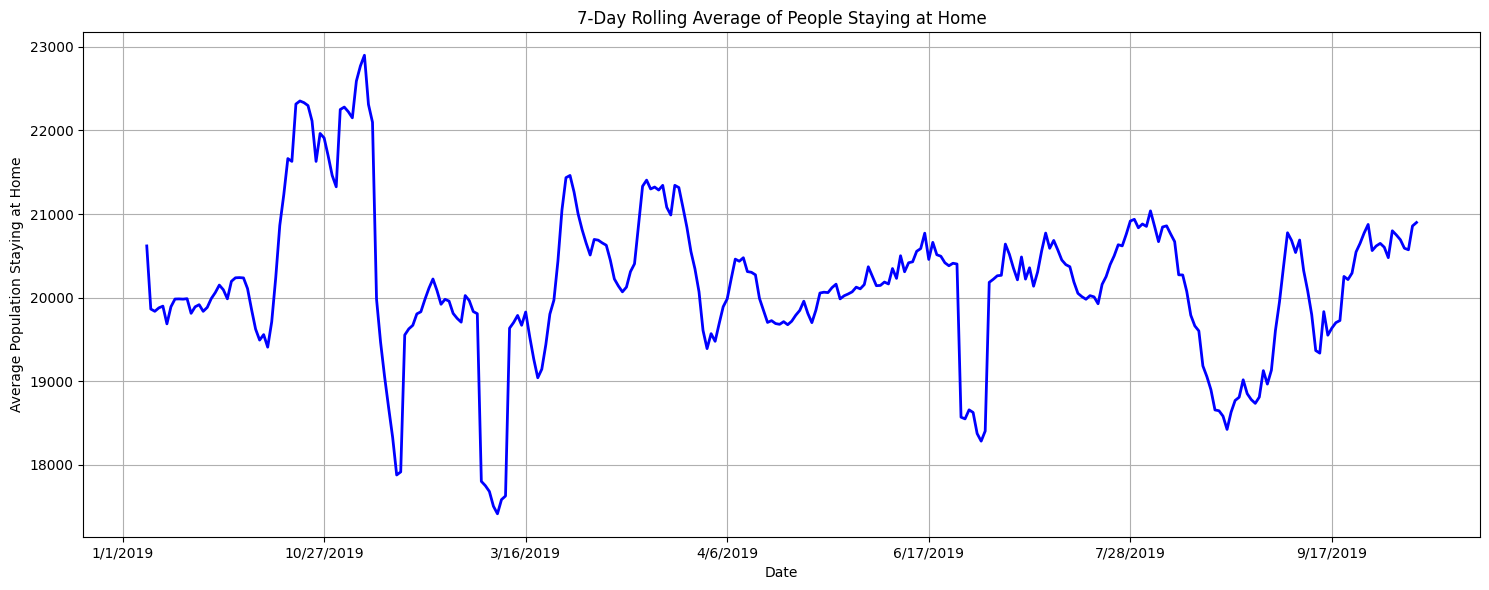

In [27]:
#Q1A


#Find the average people staying at home
# Grouping by week and calculating the average number of people staying at home
Mean_Stay_At_Home = df.groupby('Date')['Population Staying at Home'].mean()
print("AVG Population Staying at Home\n", Mean_Stay_At_Home)


#graph to explain
# Simplifying the graph for better clarity and understanding
plt.figure(figsize=(15, 6))


# Creating a rolling average for a smoother trend line
rolling_avg = Mean_Stay_At_Home.rolling(window=7).mean() # 7-day rolling average


# Plotting the rolling average
rolling_avg.plot(color='blue', linewidth=2) #plot the linegraph colour blue and width 2
plt.title('7-Day Rolling Average of People Staying at Home') #title of the graph
plt.xlabel('Date') #x axis label
plt.ylabel('Average Population Staying at Home') #y axis label
plt.grid(True) #show the grid
plt.tight_layout() #cleaner print
plt.show() #print

In [28]:
#1A part 2

# Grouping the df dataset by Date and calculating the average number of trips for each distance category
# First, we convert 'Date' to datetime for better handling
df['Date'] = pd.to_datetime(df['Date'])

# Group by week and calculate the mean
weekly_avg_trips_df = df.groupby(df['Date'].dt.isocalendar().week)[['Number of Trips <1',
                                                                      'Number of Trips 1-3',
                                                                      'Number of Trips 3-5',
                                                                      'Number of Trips 5-10',
                                                                      'Number of Trips 10-25',
                                                                      'Number of Trips 25-50',
                                                                      'Number of Trips 50-100',
                                                                      'Number of Trips 100-250',
                                                                      'Number of Trips 250-500',
                                                                      'Number of Trips >=500']].mean()

#Analysis of people when they do not stay at home, shows the average distance traveled each week
print(weekly_avg_trips_df)


      Number of Trips <1  Number of Trips 1-3  Number of Trips 3-5  \
week                                                                 
1           89880.130949         90381.075201         43547.898470   
2           93792.588848         93224.002697         44963.213848   
3           93373.275339         92958.431828         44948.429863   
4           92024.357645         92519.127649         44932.305490   
5           94945.279044         94013.840416         44946.637288   
6           92708.841077         92564.809356         45091.280009   
7           90659.081778         91342.692146         45032.929905   
8           91101.271171         91906.599133         44879.012509   
9           91279.078194         92595.967773         45156.253618   
10          93918.172903         95259.151775         46584.314228   
11         101091.765721        104671.828466         50763.403441   
12         107131.036349        113615.698845         54793.621470   
13         110205.50

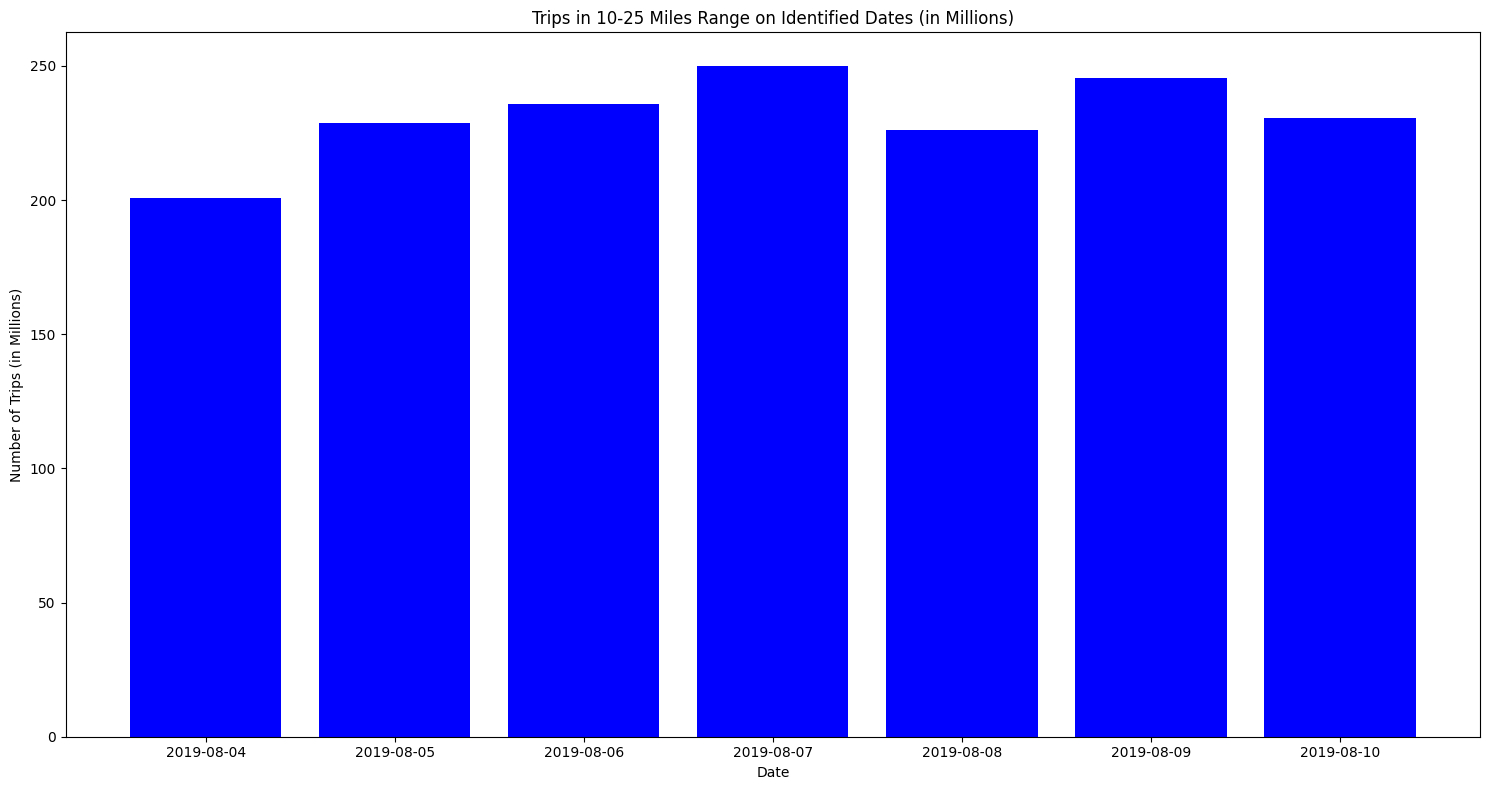

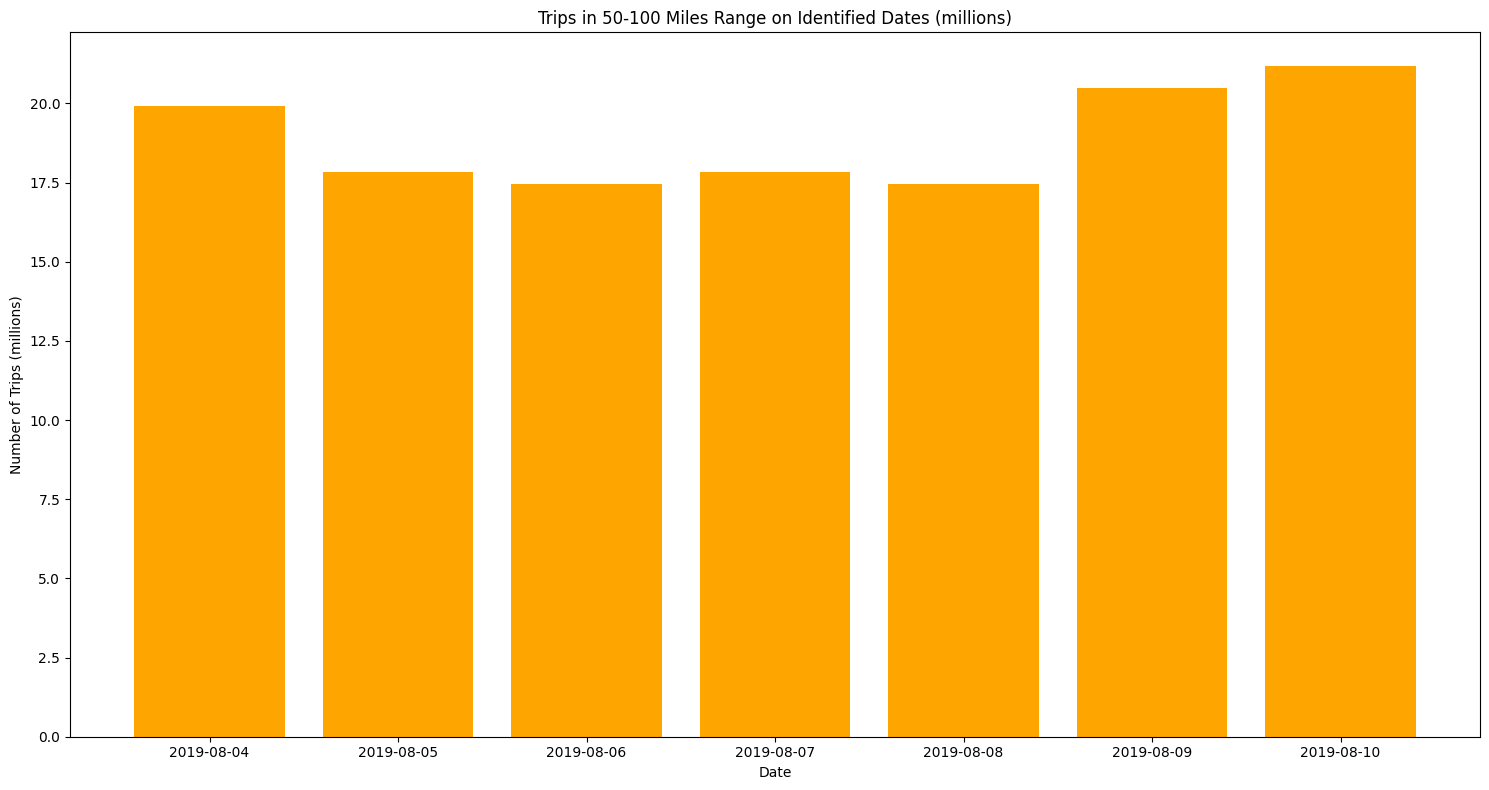

In [29]:
#1B

# Converting Date to datetime
df1['Date'] = pd.to_datetime(df1['Date'])

# Filter dates based on conditions of having more than 100000000 in the category
dates1df1 = df1[df1['Trips 10-25 Miles'] > 100000000]
dates2df1 = df1[df1['Trips 50-100 Miles'] > 10000000] 
                       
#graphs - 2 seperate bar charts for 10-25 and 50-100 miles. with the number of trips as the y axis
# Creating two separate bar charts for the identified dates
plt.figure(figsize=(15, 8)) # length and width of the graph in inches
plt.bar(dates1df1['Date'], dates1df1['Trips 10-25 Miles'] / 1000000, color='blue')  #  Divide by 1 million to make the y-axis in graph better. (not le6)
plt.title('Trips in 10-25 Miles Range on Identified Dates (in Millions)') # title of the graph
plt.xlabel('Date') #x axis label
plt.ylabel('Number of Trips (in Millions)') #y axis label
plt.tight_layout() #make neater
plt.show() # print

# For 50-100 Miles Range
plt.figure(figsize=(15, 8))
plt.bar(dates2df1['Date'], dates2df1['Trips 50-100 Miles'] / 1000000, color='orange')  # Dividing by 1 million to keep 
plt.title('Trips in 50-100 Miles Range on Identified Dates (millions)') # title of the graph
plt.xlabel('Date') #x axis label
plt.ylabel('Number of Trips (millions)') #y axis label
plt.tight_layout() #make neater
plt.show() #print


C:\Users\wonde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 57514 instead
  warnings.warn(
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\contextlib.py:142: UserWarning: Creating scratch directories is taking a surprisingly long time. (4.38s) This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)


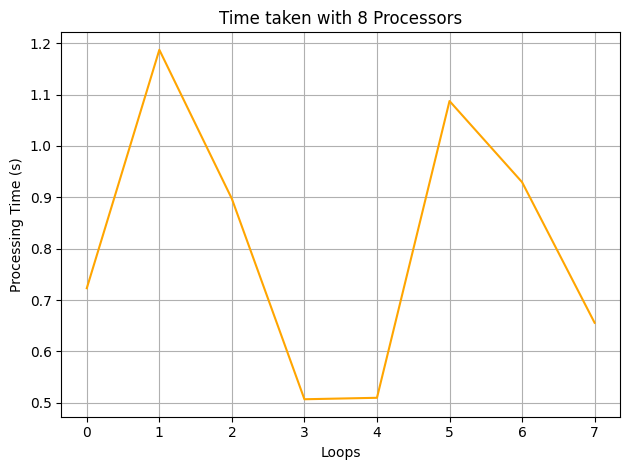

C:\Users\wonde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 57606 instead
  warnings.warn(
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\contextlib.py:142: UserWarning: Creating scratch directories is taking a surprisingly long time. (5.00s) This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)


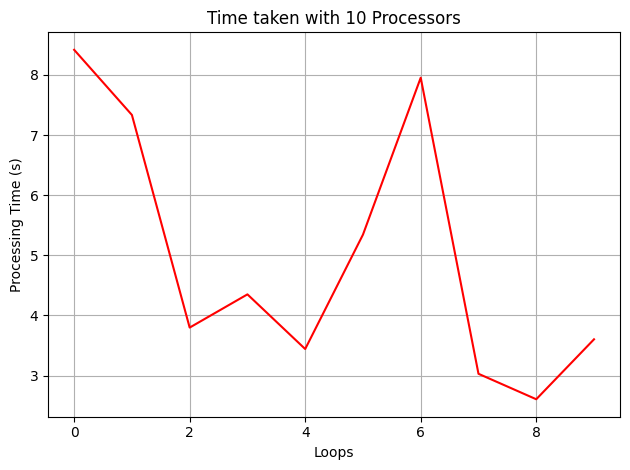

2024-03-09 21:49:14,822 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:57639', name: 7, status: running, memory: 0, processing: 0>
2024-03-09 21:49:14,911 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:57649', name: 5, status: running, memory: 0, processing: 0>
2024-03-09 21:49:14,988 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:57661', name: 3, status: running, memory: 0, processing: 0>
2024-03-09 21:49:15,256 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:57669', name: 4, status: running, memory: 0, processing: 0>
2024-03-09 21:49:15,278 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:57679', name: 6, status: runni

In [ ]:
#1C
#Please consider that the data are analysed using i) 10 and ii) 20 processors 
# Import necessary libraries: Dask for parallel data processing, time for timing operations, and matplotlib for plotting
import dask.dataframe as dd
import time
import matplotlib.pyplot as plt

# Initialize a Dask Client to manage a distributed cluster with 8 worker processes.
from dask.distributed import Client
client = Client(n_workers=8)

# Array to store the processing times for operations with 8 processors.
timingOfProcess = []

# Perform operations 8 times to measure processing times.
for i in range(8):
    startingTime = time.time() # Record start time of the operation.
    
    # Perform the operation: Read file in parallel using Dask.
    df1 = dd.read_csv('Trips_Full Data.csv')  
    df1 = df1.compute()  # Convert the Dask DataFrame to a Pandas DataFrame to complete computation.
    endingTime = time.time()  # Record end time of the operation.
    timingOfProcess.append(endingTime - startingTime) # Calculate and store the processing time.
    

# Plot the processing times for operations with 8 processors.
plt.plot(timingOfProcess, color='orange')
plt.ylabel('Processing Time (s)')
plt.xlabel('Loops')
plt.title('Time taken with 8 Processors')
plt.grid(True) # Enable grid for better readability
plt.tight_layout() # Adjust layout for a clean look
plt.show() # Display the plot


# Initialize a new Dask Client to manage a distributed cluster with 10 worker processes.
client = Client(n_workers=10)
# Array to store the processing times for operations with 10 processors.
timingOfProcess = []

# Perform operations 10 times to measure processing times with 10 processors.
for i in range(10):
    startingTime = time.time() # Record start time of the operation.
    
    # Perform the operation: Read a CSV file in parallel using Dask.
    # Replace with actual data processing operation if necessary.
    df1 = dd.read_csv('Trips_Full Data.csv')  
    df1 = df1.compute()  # Convert the Dask DataFrame to a Pandas DataFrame to complete computation.
    endingTime = time.time() # Record end time of the operation.
    timingOfProcess.append(endingTime - startingTime) # Calculate and store the processing time.

# Plot the processing times for operations with 10 processors.
plt.plot(timingOfProcess, color='red')
plt.ylabel('Processing Time (s)')
plt.xlabel('Loops')
plt.title('Time taken with 10 Processors')
plt.grid(True) # Enable grid for better readability
plt.tight_layout() # Adjust layout for a clean look
plt.show() # Display the plot


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Reshape trip_counts[0] to match the shape of trip_lengths
trip_counts_reshaped = trip_counts[0].reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(trip_lengths.reshape(-1, 1), trip_counts_reshaped, test_size=0.2, random_state=42)

# Plot the histogram of trip lengths
plt.hist(trip_lengths, bins=20, edgecolor='black')
plt.xlabel('Trip Length (miles)')
plt.ylabel('Frequency')
plt.title('Simulated Frequency of People Traveling based on Trip Length')
plt.grid(True)
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(trip_lengths.reshape(-1, 1), trip_counts[0], test_size=0.2, random_state=42)

# Fit a linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_reg.predict(X_test)

# Calculate the mean squared error
# Reshape trip_counts to match the shape of trip_lengths
trip_counts_reshaped = trip_counts.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(trip_lengths.reshape(-1, 1), trip_counts_reshaped, test_size=0.2, random_state=42)


NameError: name 'trip_counts' is not defined

      Level      Date  State FIPS State Postal Code  County FIPS County Name  \
0  National  1/1/2019         NaN               NaN          NaN         NaN   
1  National  1/2/2019         NaN               NaN          NaN         NaN   
2  National  1/3/2019         NaN               NaN          NaN         NaN   
3  National  1/4/2019         NaN               NaN          NaN         NaN   
4  National  1/5/2019         NaN               NaN          NaN         NaN   

   Population Staying at Home  Population Not Staying at Home  \
0                  77433867.0                     248733553.0   
1                  61305201.0                     264862219.0   
2                  63050480.0                     263116940.0   
3                  61803652.0                     264363768.0   
4                  64389745.0                     261777675.0   

   Number of Trips  Number of Trips <1  ...  Number of Trips 5-10  \
0     8.977844e+08         241667151.0  ...           12967

KeyError: "None of [Index(['Distance'], dtype='object')] are in the [columns]"

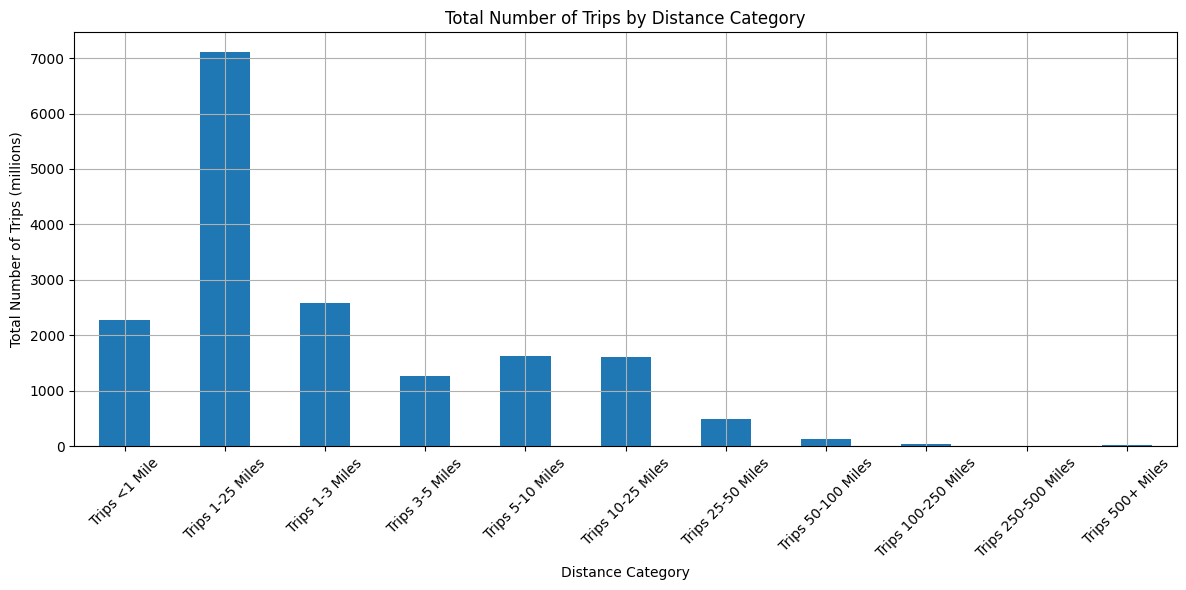

In [ ]:
#1E

# Add the total number of trips by each distance category
total_trips_by_distance = df1[['Trips <1 Mile','Trips 1-25 Miles', 'Trips 1-3 Miles', 'Trips 3-5 Miles', 
                               'Trips 5-10 Miles', 'Trips 10-25 Miles', 'Trips 25-50 Miles', 
                               'Trips 50-100 Miles', 'Trips 100-250 Miles', 'Trips 250-500 Miles', 
                               'Trips 500+ Miles']].sum() /1000000

# Creating a bar plot to visualize the number of participants by distance-trips
plt.figure(figsize=(12, 6)) # length and width of the graph in inches
total_trips_by_distance.plot(kind='bar') # type of graph
plt.title('Total Number of Trips by Distance Category') # title for graph
plt.xlabel('Distance Category') #x axis labels
plt.ylabel('Total Number of Trips (millions)') #y axis labels
plt.xticks(rotation=45) #rotates the x axis labels
plt.grid(True) # displays a grid
plt.tight_layout() # makes graph look cleaner
plt.show() # print table
